# Titanic

On April 15, 1912, the RMS Titanic collided with an iceberg, killing 1502 out of 2224 passengers and crew members. This is one of the most infamous shipwrecks in history. Lack of lifeboats for passengers and crew was a major problem, and since then, stricter safety regulations have been implemented. 

**Problem Statement:** Predict who is likely to survive the Titanic sinking.

**Dataset Description:** 12 variables (including 1 target variable) and 1309 observations

| Variable| Definition| Key |
| --- | --- | --- |
| Survived | Survival | Survived (1), Died (0) |
| Pclass | Ticket Class | Upper (1), Middle (2), Lower (3) |
| Name | Passenger's Name | |
| Sex | Passenger's Sex | |
| Age | Passenger's Age | | 
| SibSp | # of Siblings/Spouses Aboard | | 
| Parch | # of Parents/Children Aboard | | 
| Ticket | Ticket Number | | 
| Fare | Passenger Fare | | 
| Cabin | Cabin Number | |
| Embarked | Port of Embarkation | Cherbourg (C), Queenstown (Q), Southampton (S) |


**Performance Metric:** Accuracy

**Personal Goals:**
- Learn Python basics
- Work with a binary classification problem
- Complete first Kaggle Competition

**Workflow**
1. [EDA](#EDA)
2. [Data Preprocessing](#Data Preprocessing)
3. [Modeling](#Modeling)
4. [Hyperparameter Tuning](#Hyperparameter Tuning)
5. [Reflection](#Reflection)

<a id='EDA'></a>
# 01. Exploratory Data Analysis

## Loading the Data

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load in dataset
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Looking at the data set, I see that there are 12 variables. However, not all variables have equal predictive value. For example, I would assume that a passenger's name wouldn't play a large role in whether they survived or not. However, a passenger's ticket class or gender may play a larger role.

## Dataset Description

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Seven features are numeric integers or floats. Five features are strings.

## Overall Distribution

In [4]:
train.describe() #Numeric

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The training set shows that approximately 38% of the passengers survived, which is similar to the actual survival rate of 32%. In addition, most passengers were middle class and between the age of 20-40. Most passengers did not have parents or children onboard whereas ~25% had siblings or spouse onboard.

In [5]:
train.describe(include = ['O']) #Categoric

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Gilinski, Mr. Eliezer",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


Looking at this table, there seems to be more men (577) than women (314) on the Titanic. In addition, the most popular port to embark was Southampton. There also seems to be a high number of duplicate ticket numbers (24%) and several passengers shared a cabin. No one had the same name.

## Correlation

Now that I have a high level overview of the variables, I will look at the correlations between different variables.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


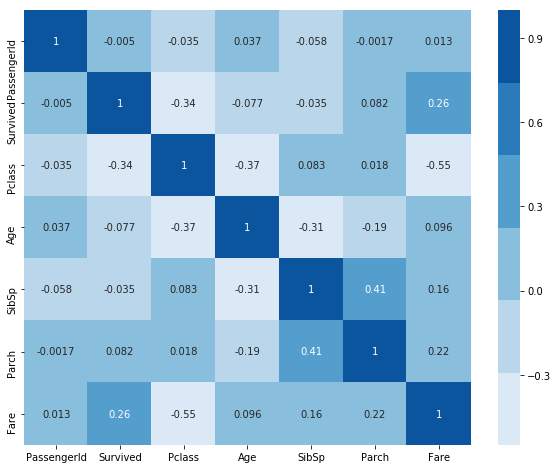

In [6]:
plt.figure(figsize=(10,8))
cor = train.corr()
sns.heatmap(cor, cmap = sns.color_palette('Blues'), annot = True)
cor

This gives me a rough idea as to where to begin. It seems that Pclass and Fare play a large role on Survival. Therefore, I will look into those variables. Using outside knowledge, I also know that Titanic followed a "women and children first" code.
Because this is a learning set, I will look at all the variables regardless and see what information I can find.

## Data Visualization

Currently, the following assumptions can be made:
1. Women (Sex = female) were more likely to have survived.
2. Children (Age < ?) were more likely to have survived.
3. Upper-class passengers (Pclass = 1) were more likely to have survived.

I will be diving into each variable with the goal of validating my assumptions. Other variables may be redundant or have no predictive value. I will explore each variable and see what I can find

### Age

Based on assumption 1, age should play a large role on survival.

Text(0.5,1.05,'Age vs. Survival Distribution')

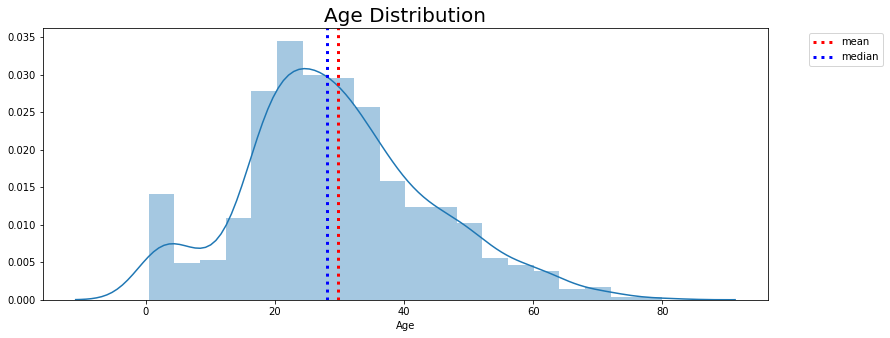

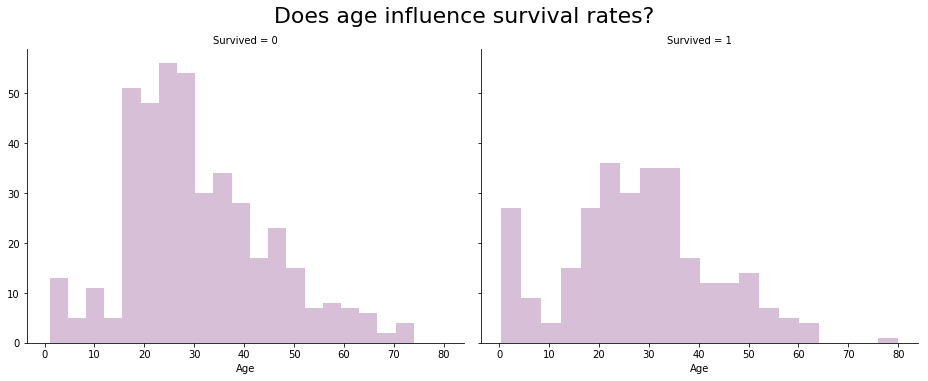

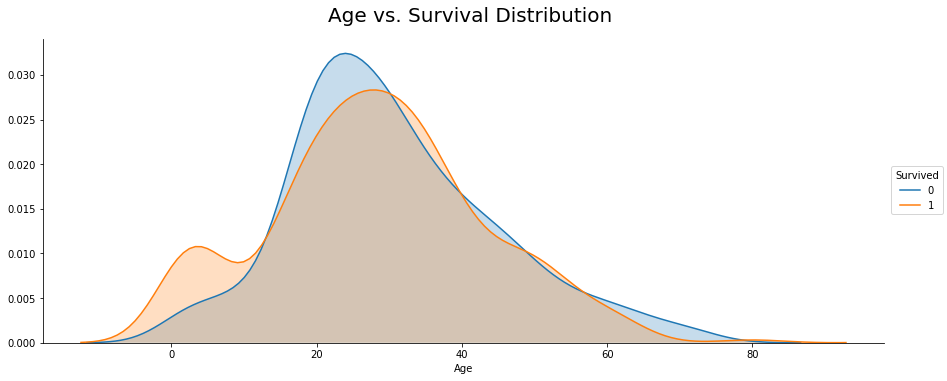

In [7]:
# Age Distribution Plot
plt.figure(figsize=(13,5))
age_plt = sns.distplot(train[np.isfinite(train['Age'])]['Age']) #Ignore Missing Values - Will be addressed later
age_plt.axvline(x = train.mean()['Age'], color = 'red', linewidth = 3, linestyle = 'dotted', label = 'mean')
age_plt.axvline(x = train.median()['Age'], color ='blue', linewidth = 3, linestyle='dotted', label='median')
age_plt.legend(bbox_to_anchor = (1.05, 1), loc = 2)
age_plt.set_title('Age Distribution', fontsize = 20)

# Age vs. Survival Plot
age_survival_plt = sns.FacetGrid(train, col = 'Survived',  hue_kws = {'color': ['thistle']}, aspect = 1.3, size = 5)
age_survival_plt.map(plt.hist, 'Age', bins = 20)
plt.suptitle('Does age influence survival rates?', fontsize = 22, y = 1.05) 

# Age vs. Survival Distribution
age_survival_dist = sns.FacetGrid(train, hue = 'Survived', aspect = 2.5, size = 5)
age_survival_dist.map(sns.kdeplot, 'Age', shade = True)
age_survival_dist.add_legend()
plt.suptitle('Age vs. Survival Distribution', fontsize = 20, y = 1.05)

**Observations:**   
The age of the passengers is slightly right skewed, such that the mean is greater than the median. Most passengers are between the ages of 15-40. There was also a large number of infants and very few elderly folks. Most 15-40 year olds did not survive, whereas the majority of children and the oldest person (Age = 80) did survive.

**Decisions:**  
1. Replace missing age values with the mean
2. Age seems to play a role in survival and should be taken into account when fitting
3. Age could benefit from being sectioned into band groups.

### Sex

Based on assumption 2, sex should play a large role on survival.

In [8]:
# Contingency Table
train[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


**Observation:**  
The contingency table shows females were significantly more likely to survive.

Text(0.5,1.02,'Sex vs. Survival Distribution')

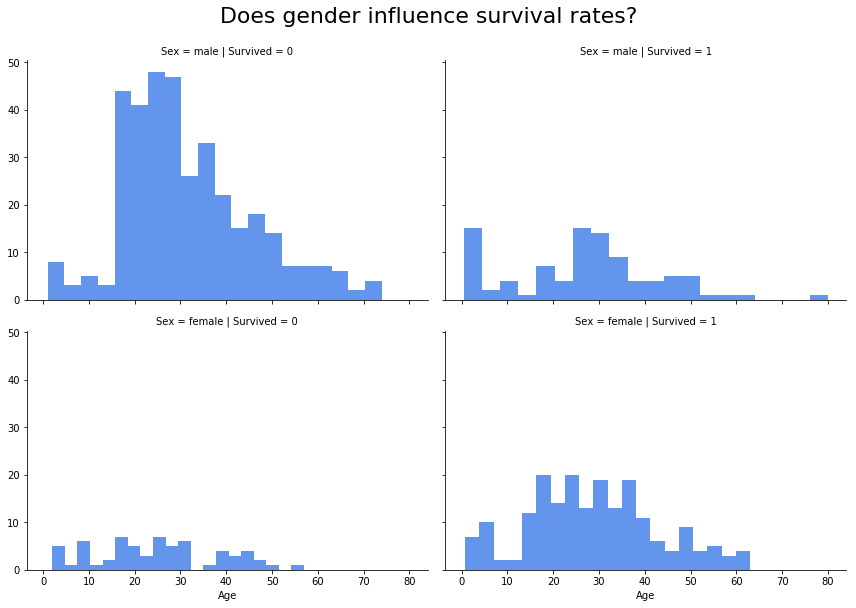

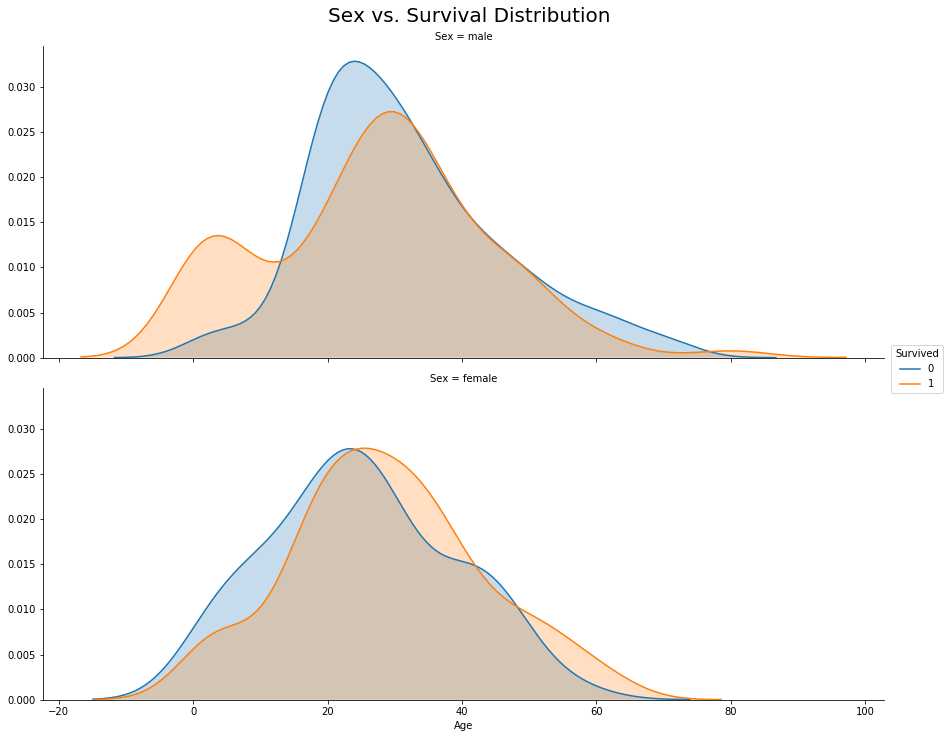

In [9]:
# Pclass vs. Survival Plot
pclass_survival_plt = sns.FacetGrid(train, col = 'Survived', row = 'Sex', hue_kws = {'color': ['cornflowerblue']}, aspect = 1.5, size = 4)
pclass_survival_plt.map(plt.hist, 'Age', bins = 20)
plt.suptitle('Does gender influence survival rates?', fontsize = 22, y = 1.05) 

# Gender vs. Survival Distribution 
sex_survival_dist = sns.FacetGrid(train, hue = 'Survived', row = 'Sex', aspect = 2.5, size = 5)
sex_survival_dist.map(sns.kdeplot, 'Age', shade = True)
sex_survival_dist.add_legend()
plt.suptitle('Sex vs. Survival Distribution', fontsize = 20, y = 1.02)

**Observation:**  
More men aboarded the Titanic than women, but women were more likely to survive than men. However, there is an exception for young boys. This graph is interesting, because in the previous age distributions, it showed that a high number of 15-35 did not survive. However, this graph shows that a high number of 15-40 did survive if they were women. 

**Decisions:**
1. Consider Sex for model training

### Pclass

Pclass is the ticket class. 1 indicates the highest class whereas 3 indicates the lowest class. It is a proxy for different socioeconomic classes. Based on assumption 3, the Pclass should play a significant role on survival.

In [10]:
# Contingency Table
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


**Observation:**  
The contingency table shows that most those in Pclass = 1 were more likely to survive than those in a Pclass = 2 or Pclass = 3. Those in Pclass = 3 were not likely to survive. 

Let's see how Pclass relates to survival.

Text(0.5,1.02,'Pclass vs. Survival')

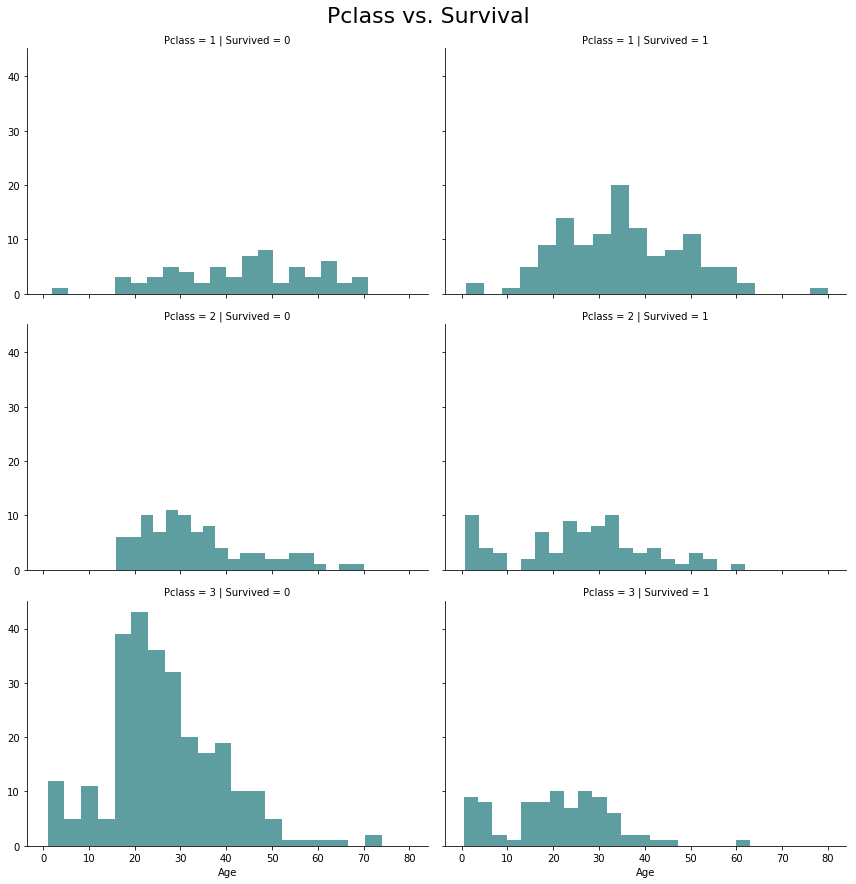

In [11]:
# Pclass vs. Survival Plot
pclass_survival_plt = sns.FacetGrid(train, col = 'Survived', row = 'Pclass', hue_kws = {'color': ['cadetblue']}, aspect = 1.5, size = 4)
pclass_survival_plt.map(plt.hist, 'Age', bins = 20)
plt.suptitle('Pclass vs. Survival', fontsize = 22, y = 1.02) 

**Observations:**  
Pclass = 3 had the most passengers, but most of them did not survive. Pclass = 1 had the highest survival rate. Infants were also more likely to survive, regardless of class. This aligns with our previous observation regarding age. There is a good distribution of ages in each class. 

**Decisions:**
1. Consider Pclass for model training

### Fare

Based on past knowledge, I will make the assumption that fare is correlated to Pclass. Higher fare most likely corresponds with better ticket class, give or take a few last minute or early reservation exceptions. Therefore, those who are paying higher fares, most likely will be in a higher class and is more likely to survive. I will validate this assumption.

Text(0.5,1.02,'Fare vs. Survival')

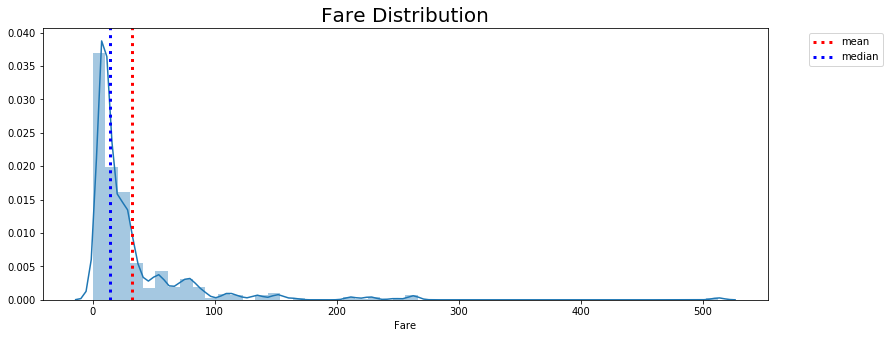

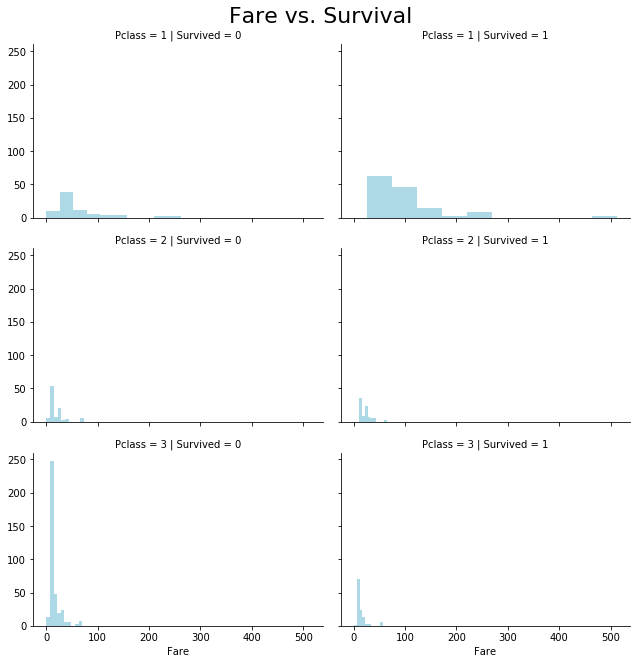

In [12]:
# Fare Distribution Plot
plt.figure(figsize=(13,5))
fare_plt = sns.distplot(train['Fare'])
fare_plt.axvline(x = train.mean()['Fare'], color = 'red', linewidth = 3, linestyle = 'dotted', label = 'mean')
fare_plt.axvline(x = train.median()['Fare'], color ='blue', linewidth = 3, linestyle='dotted', label='median')
fare_plt.legend(bbox_to_anchor = (1.05, 1), loc = 2)
fare_plt.set_title('Fare Distribution', fontsize = 20)

# Fare vs. Survival Plot
pclass_survival_plt = sns.FacetGrid(train, col = 'Survived', row = 'Pclass', hue_kws = {'color': ['lightblue']}, aspect = 1.5, size = 3)
pclass_survival_plt.map(plt.hist, 'Fare', bins = 10)
plt.suptitle('Fare vs. Survival', fontsize = 22, y = 1.02) 

**Observations:**  
Most of the fare prices costed under \$100; fare higher than \$100 were for Pclass = 1 tickets. Because fares ranged widely in the \$1-\$100 in all three classes, it is difficult to tell based on fare alone who will survive.

**Decisions:**  
1. Create fare range bands to help with analysis (Ex: Those with fare greater than \$100 tend to be in Pclass = 1 and those passengers tend to have higher survival rates)
2. Doesn't have much predictive value; Pclass provides more information

### Embarked

There are 3 ports which everyone embarked on: Cherbourg (C), Queenstown (Q), Southampton (S). Where you embarked shouldn't play a large role in whether you survived, but this needs to be verified. Embarked location might convey more information if it is also compared with different demographic variables, like gender or ticket class.

Text(0.5,1.02,'Embarked Survival Rates')

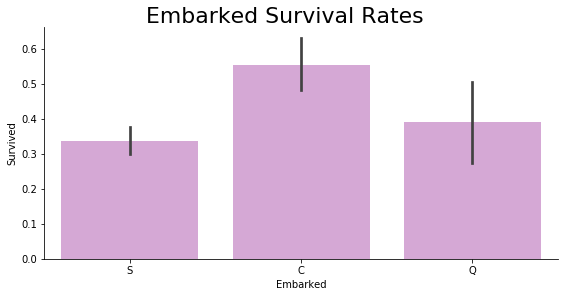

In [13]:
# Embarked Survival Rates
embarked_plt = sns.FacetGrid(train, aspect = 2, size = 4)
embarked_plt.map(sns.barplot, 'Embarked', 'Survived', color = 'plum')
plt.suptitle('Embarked Survival Rates', fontsize = 22, y = 1.02) 

**Observations**  
It seems like those who embarked at Cherbourg had a higher rate of survival compared to Southampton and Queenstown. Maybe some ports were in towns where there were more affluent passengers.

Text(0.5,1.02,'Embarked Pclass Distribution')

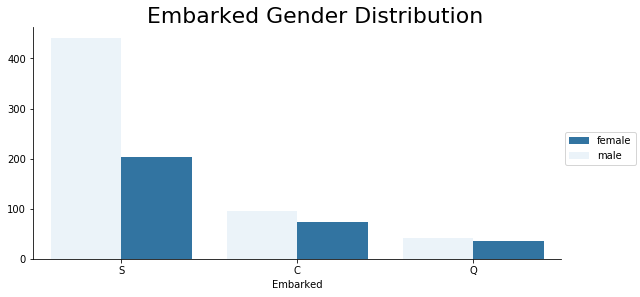

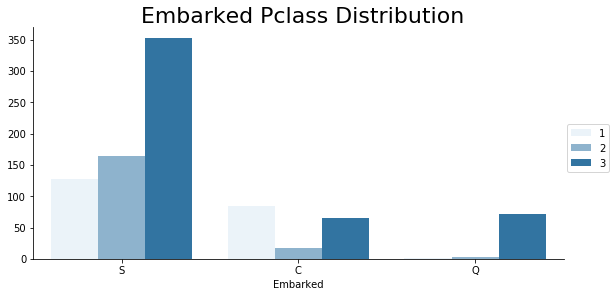

In [14]:
# Embarked Gender Distribution
embarked_gender_dist = sns.FacetGrid(train, aspect = 2, size = 4)
embarked_gender_dist.map(sns.countplot, 'Embarked', hue = 'Sex', data = train)
embarked_gender_dist.add_legend()
plt.suptitle('Embarked Gender Distribution', fontsize = 22, y = 1.02) 

# Embarked Pclass Distribution
embarked_pclass_dist = sns.FacetGrid(train, aspect = 2, size = 4)
embarked_pclass_dist.map(sns.countplot, 'Embarked', hue = 'Pclass', data = train)
embarked_pclass_dist.add_legend()
plt.suptitle('Embarked Pclass Distribution', fontsize = 22, y = 1.02)

Text(0.5,1.05,'Do people embarking at different ports have different gender or wealth status?')

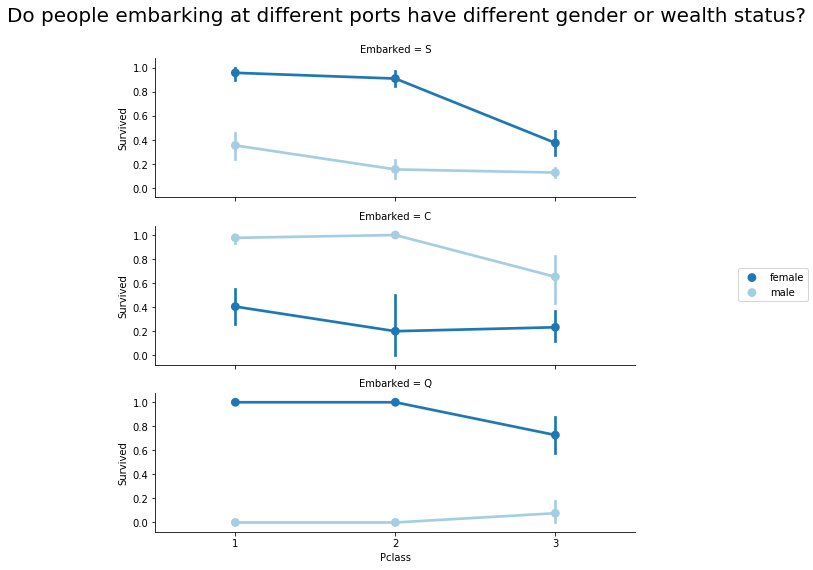

In [15]:
# Embarked vs. Gender vs. Pclass Plot
embarked_survival_plt = sns.FacetGrid(train, row='Embarked', size=2.5, aspect=3)
embarked_survival_plt.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = 'Paired')
embarked_survival_plt.add_legend()
plt.suptitle('Do people embarking at different ports have different gender or wealth status?', fontsize = 20, y = 1.05)

**Observations**  
Southampton had the lowest survival rate, which could correspond to the fact that most passengers were male and in the lower class. On the other hand, Cherbourg had the highest survival rate, which may be supported by the fact that mainly wealthier passengers embarked at that port. Also, only at Cherbourg were men more likely to survive than female. Particularly, in Queenstown, men were least likely to survive.

**Decisions:**
1. Embarked port seems to play some role in survival rate.

### SibSp & Parch

This numbers reflect how many siblings, spouses, parents, and children were onboard with the passenger. According to my heat map, these variables had very little correlation with survival rates. Let's look at the contingency table and see what we can find.

In [16]:
train[['Parch', 'Survived']].groupby(['Parch'], as_index = False).mean().sort_values(by = 'Parch')

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [17]:
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index = False).mean().sort_values(by = 'SibSp')

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


**Observations:**  
Those who had either 1-2 parent, child, sibling, or spouse on board tend to have higher survival rates. Those with too many parents, children, siblings, or spouses were less likely to survive.

**Decisions:**  
1. May benefit from creating a new category called "Family" to denote the sum between both these variables
2. May have some predictive value

### Name

Each person had a unique name. Therefore, I don't think the name of the person influenced whether or not they lived. However, what may me interesting is their title, as that could indicate social status or wealth.

**Decisions:**
1. Create new variable called "Title" with each person's title

### Ticket

There is a large number of duplicate ticket numbers and there doesn't seem to be much of a pattern regarding these tickets. This also seems strange, because each person should have their own. There may be no correlation between ticket number and survival.

**Decisions:**
1. Drop ticket as a predictive variable

### Cabin

There is a large number of missing cabin values (687 out of 891). It would be difficult to use this variable.

**Decisions:**
1. Drop Cabin as a predictive variable

## Conclusions

Based on my EDA, I need to complete the following actions:
1. Ticket feature may be dropped from our analysis, because it contains a high ratio of duplicates (22%). Cabin feature may also be dropped as it contains many missing values. There may not be any correlation between these variables and survival.
2. PassengerId may be dropped because it doesn't contribute to this dataset and is just an index.
3. The unique names of the passenger themselves may not provide any predictive value, but their titles could potentially be used. Engineer a new variable called "Title" to extract the passenger's status.
4. Parch and SibSp are closely related. It might be easier to create a new variable called "Family" to get the total count of family members on board.
5. There are missing features in the Age variable. Age is definitely correlated with survival and missing values should be completed.
6. Age and Fare may also benefit from a band or range feature.

The following assumptions are still valid:
1. Women (Sex = female) were more likely to have survived.
2. Children (Age < ?) were more likely to have survived.
3. Upper-class passengers (Pclass = 1) were more likely to have survived.

<a id='Data Preprocessing'></a>
# 02. Data Preprocessing

Now that I have developed several conclusions and a course of action, I need to clean the data that I will be working with.

## Combing Test and Train Datasets

In [18]:
test = pd.read_csv('test.csv')
titanic = train.append(test, ignore_index = True)
titanic.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1304,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
1306,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
1307,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309
1308,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,NaN,2668


## Dropping Irrelevant Variables

It has been decided that Ticket, Cabin and Id will be dropped. 

In [19]:
titanic = titanic.drop(['PassengerId', 'Ticket', 'Cabin'], axis = 1)

## Feature Engineering

### Title

Let's start by looking at whether title of a person plays a role. I will use regex to capture the title of a person's name.

In [20]:
titanic['Title'] = titanic['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(titanic['Title'], titanic['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,4
Countess,1,0
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2


Text(0.5,1.02,'Title Survival Rates')

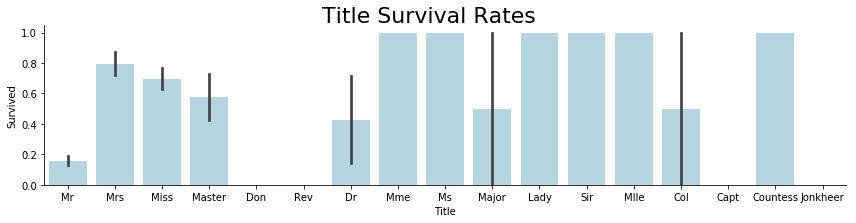

In [21]:
title_plt = sns.FacetGrid(titanic, aspect = 4, size = 3)
title_plt.map(sns.barplot, 'Title', 'Survived', color = 'lightblue')
plt.suptitle('Title Survival Rates', fontsize = 22, y = 1.02) 

**Observations:**  
It seems like some of these titles can be further consolidated. 
- Mme is the French abbreviation for Madame, or Mrs. 
- Mlle is the French abbreviation for Mademoiselle, or Ms. 
- Ms can be moved into the Miss category.
- Don & Dona are honorific titles and can be classified into a category for Royality - Men & Royality - Women.
- Capt, Col, Major, Dr and Rev were mainly men and can be classified as Officers.
- Lady and Countess are different levels of Royality - Women.
- Sir represents a knight and can be classified into Royality - Men.
- Jonkheer represents the lowest rank within royality but still can be classified as Royality - Men.

In [22]:
# Classify Titles
titanic['Title'] = titanic['Title'].replace('Mme', 'Mrs')
titanic['Title'] = titanic['Title'].replace(['Mlle', 'Ms'], 'Miss')
titanic['Title'] = titanic['Title'].replace(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer')
titanic['Title'] = titanic['Title'].replace(['Lady', 'Countess', 'Dona'], 'Royalty - Women')
titanic['Title'] = titanic['Title'].replace(['Don', 'Sir', 'Jonkheer'], 'Royalty - Men')

In [23]:
titanic[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Officer,0.277778
5,Royalty - Men,0.333333
6,Royalty - Women,1.000000


**Observations:**
As expected, women tend to have a higher survival rate than men. Royalty women are very likely to survive and 70-80% of non-royalty women also survived. Master is an English honorific for young boys and men. Based on our previous assumption, children were more likely to survive, so it makes sense that masters had a high survival rate.

**Decisions:**
1. Title seems to play a role in survival and should be kept for model fitting
2. Name is no longer needed and can be dropped

In [24]:
titanic = titanic.drop(['Name'], axis = 1)

### Family

Earlier, I mentioned that those who had either 1-2 parent, child, sibling, or spouse on board tend to have higher survival rates. Those with too many parents, children, siblings, or spouses were less likely to survive. I can combine them into a family category. Those who are travelling by themselves will be classified as None. Those who are travelling with 1-2 other people are considered a Small Family. Double that is considered a Medium Family. Anything greater than 4 is considered a Large Family.

In [25]:
# New Category: Family = Parch + SibSp
titanic['Family Size'] = titanic['Parch'] + titanic['SibSp']

# Classify Families Based on Size
titanic['Family Size'] = titanic['Family Size'].replace(0, 'None')
titanic['Family Size'] = titanic['Family Size'].replace([1,2], 'Small')
titanic['Family Size'] = titanic['Family Size'].replace([3,4], 'Medium')
titanic['Family Size'] = titanic['Family Size'].replace([5,6,7,8,9,10], 'Large')

In [26]:
titanic[['Family Size', 'Survived']].groupby(['Family Size'], as_index=False).mean()

,Family Size,Survived
0,Large,0.148936
1,Medium,0.545455
2,None,0.303538
3,Small,0.562738


**Observations:**  
Our assumptions are correct. Those with travelling in a large family were least likely to survive. Those travelling in small-medium families had the best chance of survival. 

**Decisions:**
1. Family has some predictive power and can be kept
2. Parch and SibSp are no longer needed and can be dropped

In [27]:
titanic = titanic.drop(['Parch', 'SibSp'], axis = 1)

## Accounting for Missing Values

First, let's find out which variables have missing data.

In [28]:
titanic.isnull().sum()

Age            263
Embarked         2
Fare             1
Pclass           0
Sex              0
Survived       418
Title            0
Family Size      0
dtype: int64

Survived can be ignored, as that is the target variable. There are several ways to account for missing values. 
1. Embarked: It would be easiest to just replace the missing 2 values with the most common port.
2. Fare: Because only one person's fare is missing, it would be easiest to just use the median fare to replace the missing value.
3. Age: Age is a bit trickier. There are significantly more missing values. One way I could approach this is to look at their Title and guestimate their age with the mean value of that Title's age.

In [29]:
# Embarked
freq_port = titanic.Embarked.dropna().mode()[0] #freq_port = S
titanic['Embarked'] = titanic['Embarked'].fillna(freq_port)

# Fare
titanic['Fare'].fillna(titanic['Fare'].dropna().median(), inplace=True)

In [30]:
# Average Age Based on Title
ave_age = titanic[['Title', 'Age']].groupby(['Title'], as_index=False).mean()
ave_age

,Title,Age
0,Master,5.482642
1,Miss,21.824366
2,Mr,32.252151
3,Mrs,36.918129
4,Officer,46.272727
5,Royalty - Men,42.333333
6,Royalty - Women,40.000000


In [31]:
# Age
title_names = ave_age['Title'].tolist()

for name in title_names:
    age = ave_age['Age'].loc[ave_age['Title'] == name].item()
    titanic['Age'].loc[titanic['Title'] == name] = titanic['Age'].loc[titanic['Title'] == name].fillna(age) 
    #Bug doesn't allow inplace=True to work with loc

In [32]:
# Make sure all missing variables are gone
titanic.isnull().sum()

Age              0
Embarked         0
Fare             0
Pclass           0
Sex              0
Survived       418
Title            0
Family Size      0
dtype: int64

## Creating Bands

Age and Fare could both benefit from banding and grouping. 
- Age could be separated based on what we distinguish as different age groups. 
- Fare could be separated based on quantile.

In [33]:
# Age
#bins = (0, 5, 12, 18, 25, 35, 60, 100)
#age_labels = ['Baby', 'Child', 'Teenager', 'Minor', 'Young Adult', 'Adult', 'Senior']
#titanic['Age'] = pd.cut(titanic['Age'], bins, labels = age_labels)

#Fare
#fare_labels = [1, 2, 3, 4, 5]
#titanic['Fare Quintile'] = pd.qcut(titanic['Fare'], 5, fare_labels)
#titanic = titanic.drop(['Fare'], axis = 1)

In [34]:
#titanic[['Age', 'Survived']].groupby(['Age'], as_index = False).mean()

In [35]:
#titanic[['Fare Quintile', 'Survived']].groupby(['Fare Quintile'], as_index = False).mean()

**Observations:**  
Banding together similar ranges made it easier to interpret groups of people within a similar age or fare. However, I noticed it decreased my test scores and it has been commented out.

## One Hot Encoding

In order to fit the data, all the categorical variables need to be converted to numerical values. One way to approach this is to manually map each categorical level with a number. Another faster way to do this is to one-hot encode using get_dummies. However, this method does not look as clean.

In [36]:
# Manually Mapping
#titanic['Embarked'] = titanic['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
#titanic['Family Size'] = titanic['Family Size'].map( {'None': 0, 'Small': 1, 'Medium': 2, 'Large': 3} ).astype(int)
#titanic['Sex'] = titanic['Sex'].map( {'Female': 0, 'Male': 1} ).astype(int)
#titanic['Title'] = titanic['Title'].map( {'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Officer': 4, 'Royalty - Men': 5, 'Royalty - Women': 6 } ).astype(int)

In [37]:
# One-hot Encode with get_dummies
titanic = pd.get_dummies(titanic)

## Conclusions

We are now done preprocessing the data. It is cleaned and ready to be fitted. It just needs to be split back into its original train and test group. 

In [38]:
train_cleaned = titanic[0:890]
test_cleaned = titanic[891:]

<a id='Modeling'></a>
# 03. Modeling

This is a binary classification and regression supervised learning problem. Therefore, I will fit the following models to my data:
- **Logistic Regression**: Logistic regression measures the relationship between the target and features by estimating probabilities using a logistic function.
- **KNN**: KNN is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors. 
- **Support Vector Machines**: Given a set of training samples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier.
- **Naive Bayes Classifier**: Naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong independence assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem.
- **Decision Tree**: Decision tree maps features (tree branches) to conclusions about the target value (tree leaves). 
- **Random Forest**: Random forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.
- **Perceptron**: The perceptron is an algorithm for supervised learning of binary classifiers that bases its predictions on a linear predictor function combining a set of weights with the feature vector. 

*Reference: Wikipedia*

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from tqdm import tqdm

## Train Test Split

In [40]:
X_train = train_cleaned.drop('Survived', axis=1) #Features
y_train = train_cleaned['Survived'] #Target
X_test  = test_cleaned.drop('Survived', axis=1)
X_train.shape, y_train.shape, X_test.shape #Verify everything has the right dimensions

((890, 19), (890,), (418, 19))

## Run Models

I created a function to run all my models.

In [41]:
models = {
    'Logistic Regression' : LogisticRegression(),
    'KNN' : KNeighborsClassifier(),
    'SVM' : SVC(),
    'Naive Bayes Classifier' : GaussianNB(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'Perceptron' : Perceptron()
}

In [42]:
def run_model(model, X_train, y_train, X_test):
    model.fit(X_train, y_train)
    model.predict(X_test)
    return{
        'Accuracy': round(model.score(X_train, y_train) * 100, 2)
    }

In [43]:
results = {}
model_name = models.keys()
for name in tqdm(model_name):
    results[name] = run_model(models[name], X_train, y_train, X_test)

100%|████████████████████████████████████████████| 7/7 [00:00<00:00, 30.41it/s]


## Conclusions

In [44]:
pd.DataFrame(results).T.sort_values(by = 'Accuracy', ascending = False)

,Accuracy
Decision Tree,98.43
Random Forest,96.74
SVM,86.40
Logistic Regression,83.26
Naive Bayes Classifier,81.91
KNN,81.46
Perceptron,71.12


At this point, it seemed like decision tree was my best performer. Therefore, I created my first submission file and scored ~72%.

In [45]:
# How to Create a Submission File
submission = pd.DataFrame({
        'PassengerId': test['PassengerId'],
        'Survived': DecisionTreeClassifier().fit(X_train, y_train).predict(X_test).astype(int)
    })
submission.to_csv('submission.csv', index=False)

One major problem of my model was that it overfit on the training data and performed worse on Kaggle test. I realized one way to solve this issue is to split my training data into its own train and test split and withhold my testing data set. Once I have determined the best model for my training set, then I can use it for the test dataset.

In [72]:
# New Train Test Split
features = train_cleaned.drop('Survived', axis=1)
target = train_cleaned['Survived']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.4, random_state=100)

In [73]:
def run_model(model, model_name, x_train, x_test, y_train, y_test):
    
    _ = model.fit(x_train, y_train)
    train_predict = model.predict(x_train)
    test_predict = model.predict(x_test)   
    
    return {
            'Model Name' : model_name,
            'Train Score' : round(model.score(x_train, y_train) * 100, 2),
            'Test Score' : round(model.score(x_test, y_test) * 100, 2)
    }

results = {}
model_name = models.keys()
for name in tqdm(model_name):
    results[name] = run_model(models[name], name, X_train, X_test, y_train, y_test)
    
pd.DataFrame(results).T

100%|████████████████████████████████████████████| 7/7 [00:00<00:00, 13.45it/s]


,Model Name,Test Score,Train Score
Decision Tree,Decision Tree,78.09,98.88
KNN,KNN,68.82,79.96
Logistic Regression,Logistic Regression,82.3,82.96
Naive Bayes Classifier,Naive Bayes Classifier,79.49,81.46
Perceptron,Perceptron,72.19,70.22
Random Forest,Random Forest,77.81,97.57
SVM,SVM,74.16,88.76


The train score is similar to the results I had previously obtained, verifying that they were indeed overfitted. The new test scores are a more accurate measure of which model would perform the best with my dataset. Logistic Regression and Random Forest performed the best. In order to further improve my model, I will tune its hyperparameters.

<a id='Hyperparameter Tuning'></a>

# 04. Hyperparameter Tuning

I will choose the top two algorithms from above and tune the parameters.

In [74]:
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

## Logistic Regression

In [88]:
logr = LogisticRegression()
parameters = {'penalty': ['l1', 'l2'], 
              'C' : range(20,40)
             }

acc_scorer = make_scorer(accuracy_score)

# Run the 10-fold grid search
grid_obj = GridSearchCV(logr, parameters, cv = 10, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the algorithm to the best combination of parameters
logr = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
logr.fit(X_train, y_train)

LogisticRegression(C=31, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [89]:
logr.predict(X_test)
round(logr.score(X_train, y_train) * 100, 2)

82.77

## Random Forest

In [78]:
rfc = RandomForestClassifier()
parameters = {'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy'],
              'max_depth': range(1,10), 
              'min_samples_split': range(2,5),
              'min_samples_leaf': range(1,5),
              'n_estimators': range(2,10)
             }

acc_scorer = make_scorer(accuracy_score)

# Run the 10-fold grid search
grid_obj = GridSearchCV(rfc, parameters, cv = 10, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the algorithm to the best combination of parameters
rfc = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=4, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=3, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [79]:
rfc.predict(X_test)
round(rfc.score(X_train, y_train) * 100, 2)

80.9

## Conclusions

Both models seem to improve after tuning. I am going to use the logistic regression and predict the survival rates of the test data set.

In [93]:
submission = pd.DataFrame({ 
        'PassengerId': test['PassengerId'],
        'Survived': logr.predict(test_cleaned.drop('Survived', axis=1)).astype(int)
    })
submission.to_csv('submission.csv', index=False)

This performed a substantial 8% higher than before, bringing my current score to 78.4%. 

<a id='Reflection'></a>

# 05. Reflection

This was my first time completing an entire Kaggle competition. Previously, I did most of my work in R and using Python was different. I didn't find the language as intuitive and it also made me really appreciate R's ggplot. However, the model fitting portion was definitely easier with Python.

**Ways to Improve:**  
- Use ensemble modeling: According to Kaggle, ensembling is a form of meta learning that combines two or more classifiers by averaging or voting. I've gone over other notebooks that discuss ensembling methods, but I personally don't think I understand the theoretical concepts well enough to use them. This is definitely a goal for the future.
- Better understand what models to use: I am still learning when is the best time to use what algorithm for different type of problems. My next goal is to understand more mathematical and statisitcal concepts behind these algorithms.

Overall, I am happy with my results. With more practice, I am sure my score will improve.